In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [2]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np


In [3]:

file_path = 'Salary_dataset.csv' # set filepath

data = np.genfromtxt(file_path
                     ,delimiter=','
                     ,skip_header=1
                     ,usecols=(1, 2)
                     ,dtype=[('YearsExperience', 'f8') # f8 float point
                     ,('Salary', 'f8')]) #f8 float point

print(data)

[( 1.2,  39344.) ( 1.4,  46206.) ( 1.6,  37732.) ( 2.1,  43526.)
 ( 2.3,  39892.) ( 3. ,  56643.) ( 3.1,  60151.) ( 3.3,  54446.)
 ( 3.3,  64446.) ( 3.8,  57190.) ( 4. ,  63219.) ( 4.1,  55795.)
 ( 4.1,  56958.) ( 4.2,  57082.) ( 4.6,  61112.) ( 5. ,  67939.)
 ( 5.2,  66030.) ( 5.4,  83089.) ( 6. ,  81364.) ( 6.1,  93941.)
 ( 6.9,  91739.) ( 7.2,  98274.) ( 8. , 101303.) ( 8.3, 113813.)
 ( 8.8, 109432.) ( 9.1, 105583.) ( 9.6, 116970.) ( 9.7, 112636.)
 (10.4, 122392.) (10.6, 121873.)]


In [4]:
# Features
X = data['YearsExperience']
Y = data['Salary']

# Reshape X to be 2D as expected by most model fitting functions
X = X.reshape(-1, 1)

# Print X and Y to verify
print("Years of Experience:", X.T)
print("Salary:", Y)

Years of Experience: [[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
   4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
  10.4 10.6]]
Salary: [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


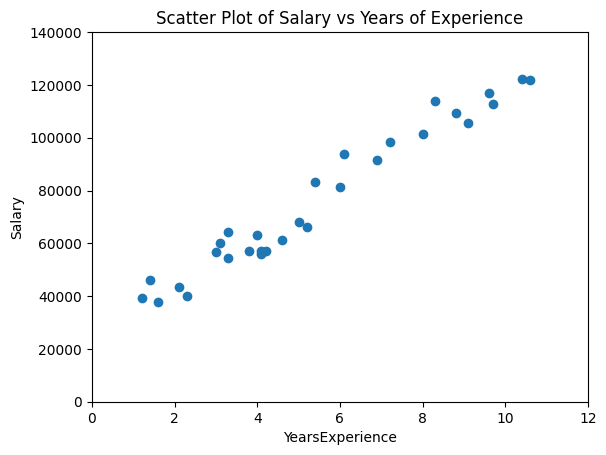

In [5]:
import matplotlib.pyplot as plt
# Plot
plt.scatter(X, Y)

# Labels
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs Years of Experience')

# Limits
plt.xlim(left=0, right=12)
plt.ylim(bottom=0, top=140000)

plt.show()

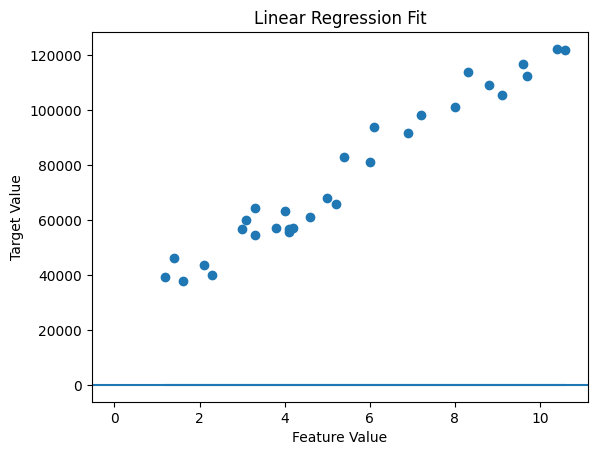

In [6]:
def visualize(theta, X, y):
    X = np.column_stack((np.ones(X.shape[0]), X))
    x_values = np.linspace(min(X[:,1]), max(X[:,1]), 100)
    y_values = theta[0] + theta[1] * x_values
    plt.xlim()


    # Plot
    plt.scatter(X[:,1], y)
    plt.plot(x_values, y_values)
    plt.axline([0, theta[0]], slope=theta[1], label='Theta')

    # Labels
    plt.title('Linear Regression Fit')
    plt.xlabel('Feature Value')
    plt.ylabel('Target Value')


    plt.show()

# Test the function with theta as zeros
theta = np.zeros(2)
visualize(theta, X, Y)

In [7]:
# Adjust the shapes
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

In [8]:

def fit(X, y, theta, alpha, num_iters):
    """
    Function to train a linear regression model using the gradient descent algorithm.

    Parameters:
    X (array-like): Feature matrix of input data.
    y (array-like): Corresponding output vector to the input data.
    theta (array-like): Model parameters vector.
    alpha (float): Learning rate.
    num_iters (int): Number of iterations of the optimization algorithm.

    Returns:
    theta (array-like): Updated model parameters after training.
    """

# Parameters
    X = np.insert(X, 0, 1, axis=1)
    m = len(y) # sample number

    for i in range(num_iters): # receive the number of iterations
        prediction = predict(X, theta) # predict the theta value
        errors = prediction - y # calculate the error
        gradient = np.dot(X.T, errors) / m # calculate the gradient to
        theta -= alpha * gradient # adjust to the oposite value of the gradient

    return theta

# Prediction function
def predict(X, theta):
    return np.dot(X, theta)


In [9]:
# Parameters
alpha = 0.01 # learning rate for the gradient descent
num_iters = 1000

# Initialize theta
theta = np.zeros(2)

# Run the gradient descent algorithm to find the optimized theta values
finetuned_theta = fit(X, Y, theta, alpha, num_iters)
print(finetuned_theta) # return the optimum theta 0 and theta1


[21912.58918422  9880.81400461]


In [10]:

# Initialize theta to zeros as per the exercise instructions
theta = np.zeros(2)

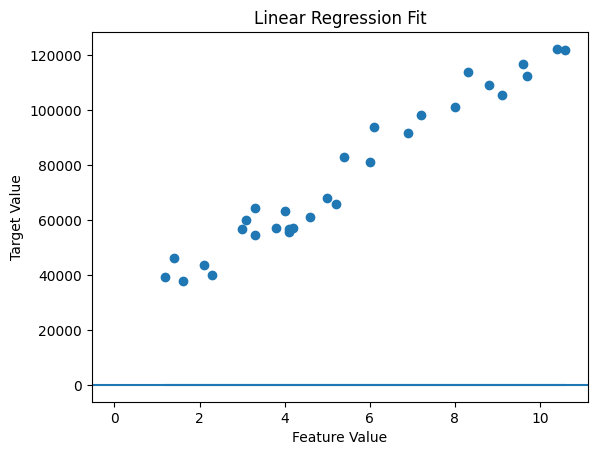

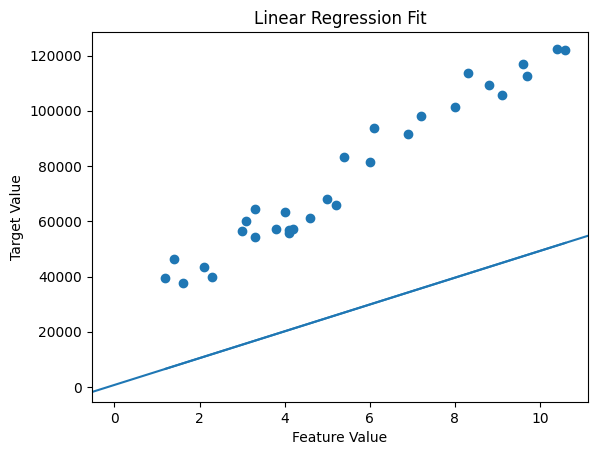

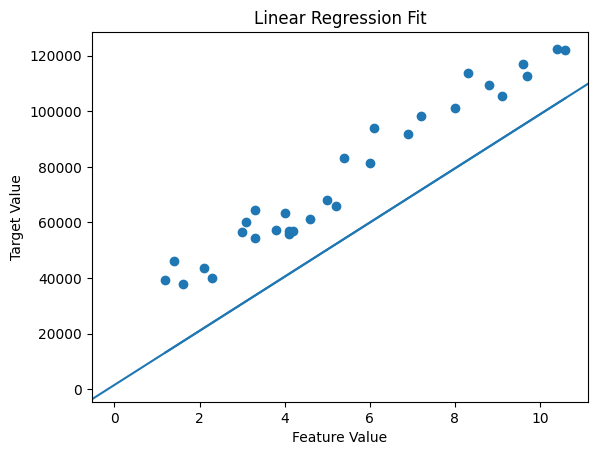

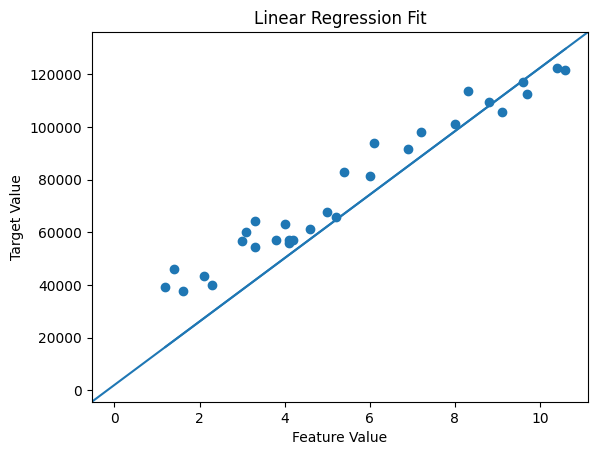

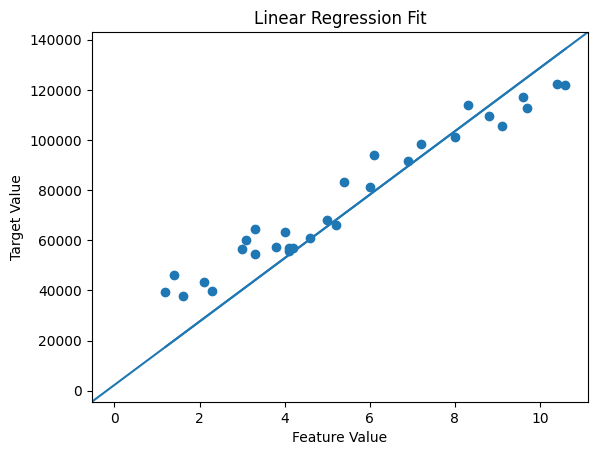

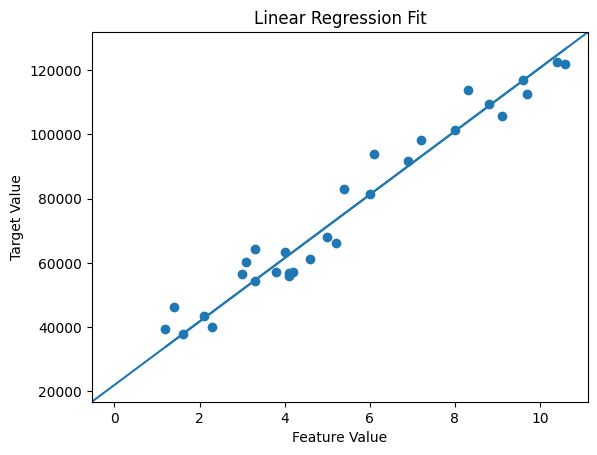

In [11]:
# Ok, let's test our function now, you should get a result comparable to this one
visualize(fit(X, Y, theta, 0.01, 0), X, Y)
visualize(fit(X, Y, theta, 0.01, 1), X, Y)
visualize(fit(X, Y, theta, 0.01, 2), X, Y)
visualize(fit(X, Y, theta, 0.01, 3), X, Y)
visualize(fit(X, Y, theta, 0.01, 4), X, Y)
visualize(fit(X, Y, theta, 0.01, 1000), X, Y)

In [12]:
def cost(X, y, theta):
    """
    Function to compute the cost (mean squared error) for a linear regression model.

    Parameters:
        X (array-like): Feature matrix of input data.
        y (array-like): Corresponding output vector to the input data.
        theta (array-like): Model parameters vector.

    Returns:
        cost (float): Mean squared error of the model predictions.
    """
    m = len(y)  # number of training examples
    predictions = X.dot(theta)  # matrix multiplication for predictions
    errors = predictions - y  # compute the errors
    squared_errors = errors**2  # square each error term
    cost = (1 / (2 * m)) * np.sum(squared_errors)  # compute the mean squared error
    return cost

In [13]:
# X and Y are already defined in environment
# Make sure X includes a column of ones for the intercept if it does not yet have it
if X.ndim == 1:
    X = X.reshape(-1, 1)  # Reshape X to be a 2D array if it's not already
X = np.insert(X, 0, 1, axis=1)  # Insert a column of ones at the index 0 for the intercept

# Test it with theta = [0,0]. You should get approximately 3251553638.
theta_zero = np.array([0, 0])
cost_for_theta_zero = cost(X, Y, theta_zero)
print(cost_for_theta_zero)


3251553638.866667


In [14]:
def predict(X, theta):
    return np.dot(X, theta)

def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = []

    for itr in range(num_iters):
        predictions = predict(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= alpha * gradient
        cost_value = cost(X, y, theta)
        J_history.append(cost_value)

    return (theta, J_history)

# Ensure X is prepared
if X.ndim == 1:
    X = X.reshape(-1, 1)
if np.all(X[:, 0] != 1):
    X = np.insert(X, 0, 1, axis=1)  # Add intercept term

# Initialize theta with zeros for each feature
theta = np.zeros(X.shape[1])

# Define learning rate and iterations
alpha = 0.001
num_iters = 100

# Start the training
theta, J_history = fit_with_cost(X, Y, theta, alpha, num_iters)
print("Theta after fitting:", theta)
print("Cost history:", J_history)

Theta after fitting: [ 2309.28858258 12482.56250236]
Cost history: [3015112434.5917063, 2796244809.6039634, 2593644476.8563786, 2406102248.8579545, 2232498820.022907, 2071798085.5257049, 1923040956.7821906, 1785339636.641324, 1657872320.116127, 1539878289.0224388, 1430653371.2453456, 1329545737.5295925, 1235952010.7049966, 1149313664.122775, 1069113687.8050503, 994873502.4077177, 926150102.5761136, 862533412.642144, 803643838.8790009, 749130003.7028583, 698666648.2969792, 651952691.1389688, 608709430.8425198, 568678882.5863825, 531622238.2006999, 497318440.718943, 465562864.8869377, 436166095.7529271, 408952798.048066, 383760669.6086661, 360439472.59316283, 338850136.71112657, 318863929.1114876, 300361685.9750267, 283233101.224503, 267376068.10672182, 252696069.7164408, 239105614.82414553, 226523715.6401463, 214875404.39776486, 204091285.8700918, 194107123.1492833, 184863454.2159109, 176305237.00966096, 168381520.8828113, 161045142.4753847, 154252444.19665673, 147963013.6326316, 142139

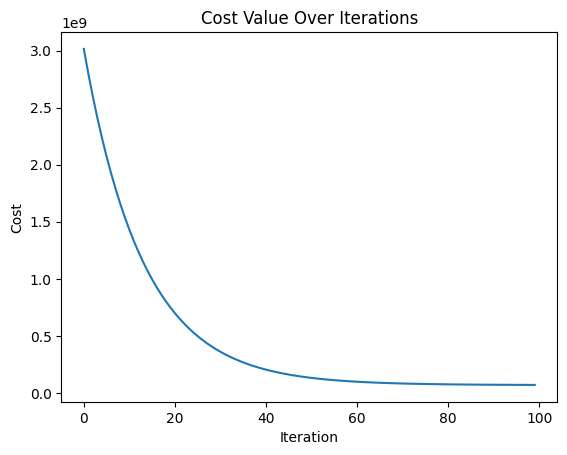

In [15]:

# Assuming J_history contains the cost values from the gradient descent
# which you have already computed in the previous steps

plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Value Over Iterations')
plt.show()

In [16]:
def predict(x, theta):
    # Assuming theta[0] is the intercept and theta[1] is the slope
    return theta[0] + theta[1] * x


In [17]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))


Predicted salary for 10 years of experience 127134.91360616997


In [18]:
# Years of experience of the person you want to predict the salary for
years_experience = 15

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))


Predicted salary for 15 years of experience 189547.72611796323
